### Objetivo del Análisis
- **Objetivo General:** Determinar patrones de compra, comportamiento del cliente y tendencias en las transacciones de ventas en línea. Esto puede ayudar a mejorar la estrategia de ventas, optimizar el inventario y personalizar las ofertas para los clientes.
- **Contexto del Problema:** El dataset proviene de un minorista en línea con sede en el Reino Unido que vende principalmente regalos. Incluye transacciones de diciembre de 2010 a diciembre de 2011.

**Significado de las Columnas:**
1. **InvoiceNo:** Un identificador único para cada factura. Corresponde a una transacción específica.
2. **StockCode:** Un identificador único para cada producto.
3. **Description:** La descripción del producto.
4. **Quantity:** La cantidad de cada producto por transacción. Puede ser negativo en caso de devoluciones.
5. **InvoiceDate:** La fecha y hora en que se generó la factura.
6. **UnitPrice:** El precio unitario del producto en libras esterlinas.
7. **CustomerID:** Un identificador único para cada cliente.
8. **Country:** El país donde reside el cliente.

Fuente: [Online Retail Data Set | Kaggle](https://www.kaggle.com/datasets/vijayuv/onlineretail)

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '../data/raw/OnlineRetail.csv'

df = pd.read_csv(file_path, encoding='latin-1')

print("Primeras filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nForma del dataset (filas, columnas):")
print(df.shape)

print("\nNúmero de valores únicos por columna:")
print(df.nunique())

Primeras filas del dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  -

### Identificación de Valores Nulos

Primero, identificamos las columnas con valores nulos y el porcentaje de valores nulos en cada una. Esto nos ayudará a entender la magnitud del problema y a decidir una estrategia adecuada para manejar los valores faltantes.

In [19]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

print("Valores nulos por columna y su porcentaje:")
print(missing_data)

Valores nulos por columna y su porcentaje:
             Missing Values  Percentage
InvoiceNo                 0    0.000000
StockCode                 0    0.000000
Description            1454    0.268311
Quantity                  0    0.000000
InvoiceDate               0    0.000000
UnitPrice                 0    0.000000
CustomerID           135080   24.926694
Country                   0    0.000000


#### Decisiones sobre el Manejo de Valores Nulos

1. **Eliminación de la Columna `CustomerID`**
Para efectos de un análisis global, se considera que la columna `CustomerID` no es esencial. En lugar de imputar valores nulos, se opta por eliminar completamente esta columna. Esta decisión se toma considerando que `CustomerID` no aporta información significativa para la mayoría de los modelos de análisis que podríamos desarrollar con este dataset.

2. **Eliminación de Filas con `Description` Nula**
Para mantener la integridad del dataset y evitar problemas futuros en sistemas de recomendación, se decide eliminar las filas que tienen valores nulos en la columna `Description`. Reemplazar estas descripciones nulas podría introducir falsas coincidencias y afectar negativamente cualquier análisis de texto o modelo de recomendación basado en descripciones de productos.

In [20]:
df.drop(columns=['CustomerID'], inplace=True)
df.dropna(subset=['Description'], inplace=True)

print("\nVerificación después de eliminar 'CustomerID' y filas con 'Description' nula:")
print(df.info())

print("\nNúmero de valores únicos por columna:")
print(df.nunique())


Verificación después de eliminar 'CustomerID' y filas con 'Description' nula:
<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 33.0+ MB
None

Número de valores únicos por columna:
InvoiceNo      24446
StockCode       3958
Description     4223
Quantity         671
InvoiceDate    22309
UnitPrice       1630
Country           38
dtype: int64


### Exploración de características

Las visualizaciones y estadísticas descriptivas nos proporcionarán una comprensión más profunda de la distribución y relaciones en nuestro dataset. Esto nos permitirá identificar patrones, tendencias y posibles problemas como outliers o relaciones fuertes entre variables que podrían ser útiles en análisis posteriores.

**Características a analizar:**

 `Quantity` y `UnitPrice` son variables numéricas continuas, lo que permite realizar análisis estadísticos y visualizaciones como histogramas y matrices de correlación. Este tipo de análisis es crucial para entender las distribuciones y relaciones cuantitativas en los datos.

**Otras Columnas en el Dataset:**

- **InvoiceNo:** Un identificador único para cada transacción. Aunque es útil para la identificación, no aporta información cuantitativa directamente analizable.
- **StockCode:** Un identificador único para cada producto. Similar a `InvoiceNo`, su análisis puede ser relevante para entender la variedad de productos pero no proporciona información cuantitativa directamente.
- **Description:** Descripción del producto. Es una variable categórica de texto que puede ser analizada en estudios de procesamiento de lenguaje natural o análisis de texto.
- **InvoiceDate:** Fecha y hora de la transacción. Importante para análisis temporales y de tendencias estacionales, pero se requiere un enfoque diferente para su análisis (series temporales).
- **Country:** País del cliente. Útil para análisis geográficos y segmentación de mercado, pero requiere una visualización diferente (como mapas).

**Conclusión:**

El análisis detallado de `Quantity` y `UnitPrice` se justifica debido a su relevancia directa en el análisis de ventas y su naturaleza cuantitativa que permite una exploración estadística significativa. Sin embargo, las otras columnas no se descartan y pueden ser analizadas posteriormente en contextos específicos como series temporales, análisis geográficos o estudios de procesamiento de lenguaje natural.


Estadísticas descriptivas del dataset:
            Quantity      UnitPrice
count  540455.000000  540455.000000
mean        9.603129       4.623519
std       218.007598      96.889628
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


/Users/cucobein/Library/Caches/pypoetry/virtualenvs/mlops-bootcamp-e7-FZNNVRIY-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


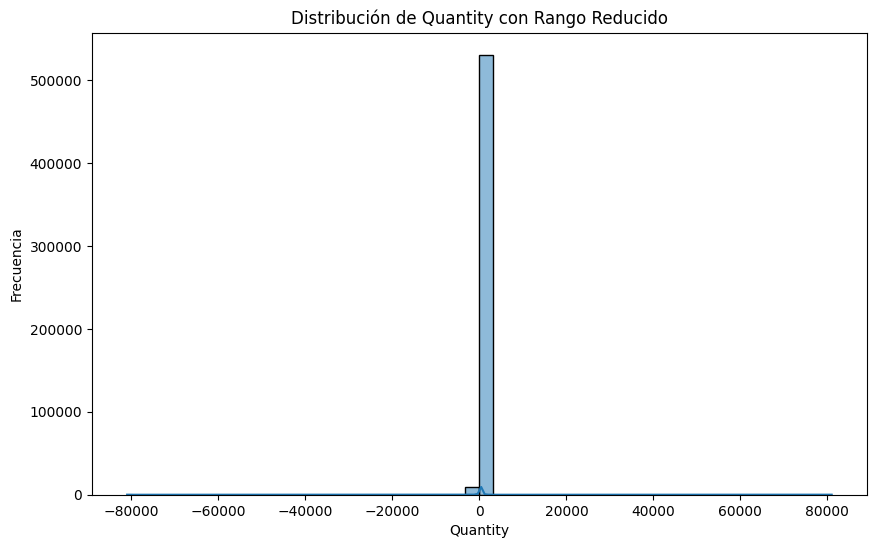

/Users/cucobein/Library/Caches/pypoetry/virtualenvs/mlops-bootcamp-e7-FZNNVRIY-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


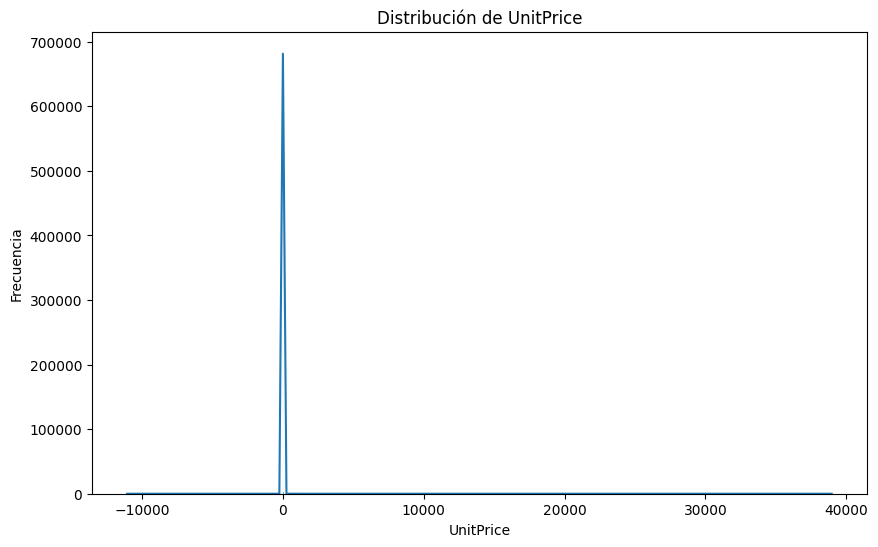

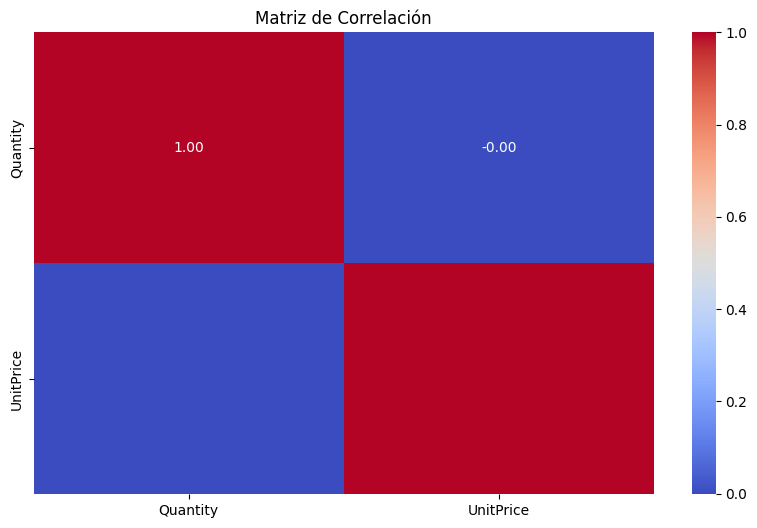


Percentiles de Quantity y UnitPrice:
      Quantity  UnitPrice
0.01      -2.0       0.29
0.05       1.0       0.42
0.10       1.0       0.65
0.25       1.0       1.25
0.50       3.0       2.08
0.75      10.0       4.13
0.90      24.0       7.95
0.95      28.0       9.95
0.99     100.0      18.00


In [37]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular estadísticas descriptivas del dataset
print("\nEstadísticas descriptivas del dataset:")
print(df_numeric.describe())

# Histograma de 'Quantity' con rango reducido
plt.figure(figsize=(10, 6))
sns.histplot(df_numeric['Quantity'], bins=50, kde=True)
# plt.xlim(-100, 100)
plt.title('Distribución de Quantity con Rango Reducido')
plt.xlabel('Quantity')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de 'UnitPrice'
plt.figure(figsize=(10, 6))
sns.histplot(df_numeric['UnitPrice'], bins=2000, kde=True)
# plt.xlim(-100, 100)

plt.title('Distribución de UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frecuencia')
plt.show()

# Matriz de Correlación
plt.figure(figsize=(10, 6))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Calcular percentiles adicionales para Quantity y UnitPrice
percentiles = df_numeric[['Quantity', 'UnitPrice']].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nPercentiles de Quantity y UnitPrice:")
print(percentiles)